## Task for Vehicle Component Identification

### Step 1: User's Initial Need
  User Goal: The user wants to identify specific components of a car, such as the meter display, for informational or troubleshooting purposes.Initiating Action: The user encounters a car-related issue or simply desires to learn more about their vehicle's components.

### Step 2: User Interaction
  Action: The user takes a picture of the car component they want to identify, such as the meter display, using a mobile device or camera.Expectation: The user anticipates a solution that can accurately recognize and label the components within the image.
### Step 3:
  Image SubmissionAction: The user submits the image of the car component through a dedicated interface or application.Expectation: The user expects a prompt response and accurate identification of the desired components.

### Step 4:
  Server ProcessingAction: The server receives the user's image and initiates processing.Process: Utilizing advanced object detection algorithms and trained models, the server analyzes the image to identify and segment relevant components.

### Step 5:
  Component IdentificationAction: The server identifies various components within the image, such as the tachometer, odometer, speedometer, and multi-function display.Result: Each component is accurately labeled and segmented within the image, providing clear visual cues for identification.

### Step 6:
  Response to UserAction: The server sends back the processed image with labeled components to the user's device.Outcome: The user receives the annotated image, clearly indicating the identified components of the car's meter display.

### Step 7:
  User Review and ActionAction: The user reviews the annotated image to confirm the identification of the desired components.Decision: Based on the identified components, the user may proceed with troubleshooting, maintenance, or further research as needed.

### Step 8:
  Feedback and IterationAction: The user provides feedback on the accuracy and usability of the component identification process.Outcome: Feedback is used to refine the system, improving accuracy, user experience, and overall effectiveness for future interactions.
  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installing the Detectron2 Framework
Open Source Object Detection and Segmentation framework developed by Facebook AI Research

### Why Detectron?
  Designed to be flexible, easy to use and it puts focus on rapid research. Includes implementations of state of the art algorithms like Mask RCNN, RetinaNet.

In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core


!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 5.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15359, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 15359 (delta 31), reused 43 (delta 16), pack-reused 15275
Receiving objects: 100% (15359/15359), 6.23 MiB | 9.80 MiB/s, done.
Resolving deltas: 100% (11146/11146), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00
  P

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


**Detectron uses 2 stage approach to object detection:**

  - It uses Regional Proposal Network to generate a set of character regions.
  - It uses Mask RCNN model to classify and segment candidate regions.
  

*Regional Proposal Network: It is a convolutional neural network taht takes image as input and generated a set of candidate regions. RPN is trained to predict score for each region, indicating how likely it is to contain an object.*

In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

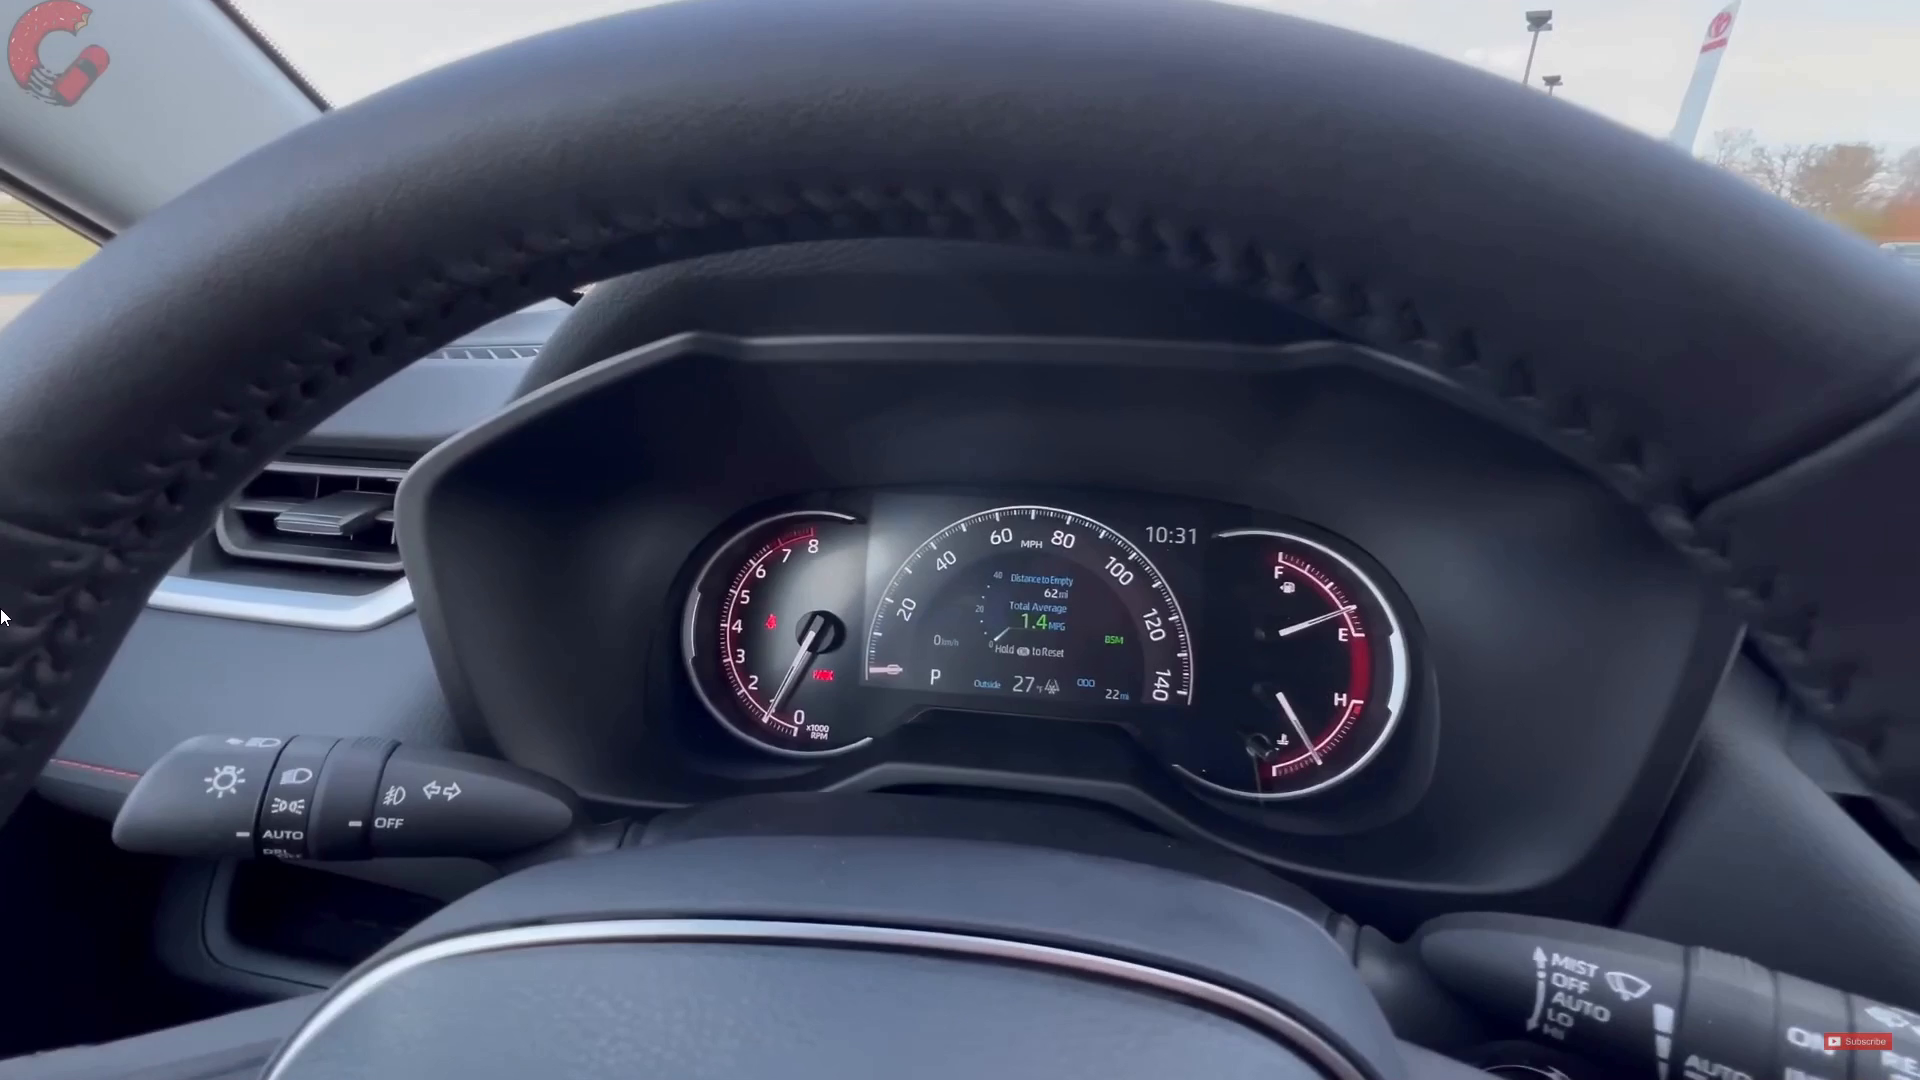

In [5]:
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train/1.png")
cv2_imshow(im)

In [6]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

In [7]:
cfg = get_cfg()
# Selecting a pretrained model
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# set threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# initailise the weights for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
# Make Prediction on input image before training to set a baseline behaviour
outputs = predictor(im)

[03/04 02:15:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:01, 167MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 2,  2, 74], device='cuda:0')
Boxes(tensor([[   0.0000,    0.0000, 1920.0000, 1038.5623],
        [ 167.9517,  820.9561, 1522.1460, 1063.5634],
        [1179.3599,  498.2883, 1431.3326,  827.5601]], device='cuda:0'))


Without the initial training the model is able to generate **segmentations**

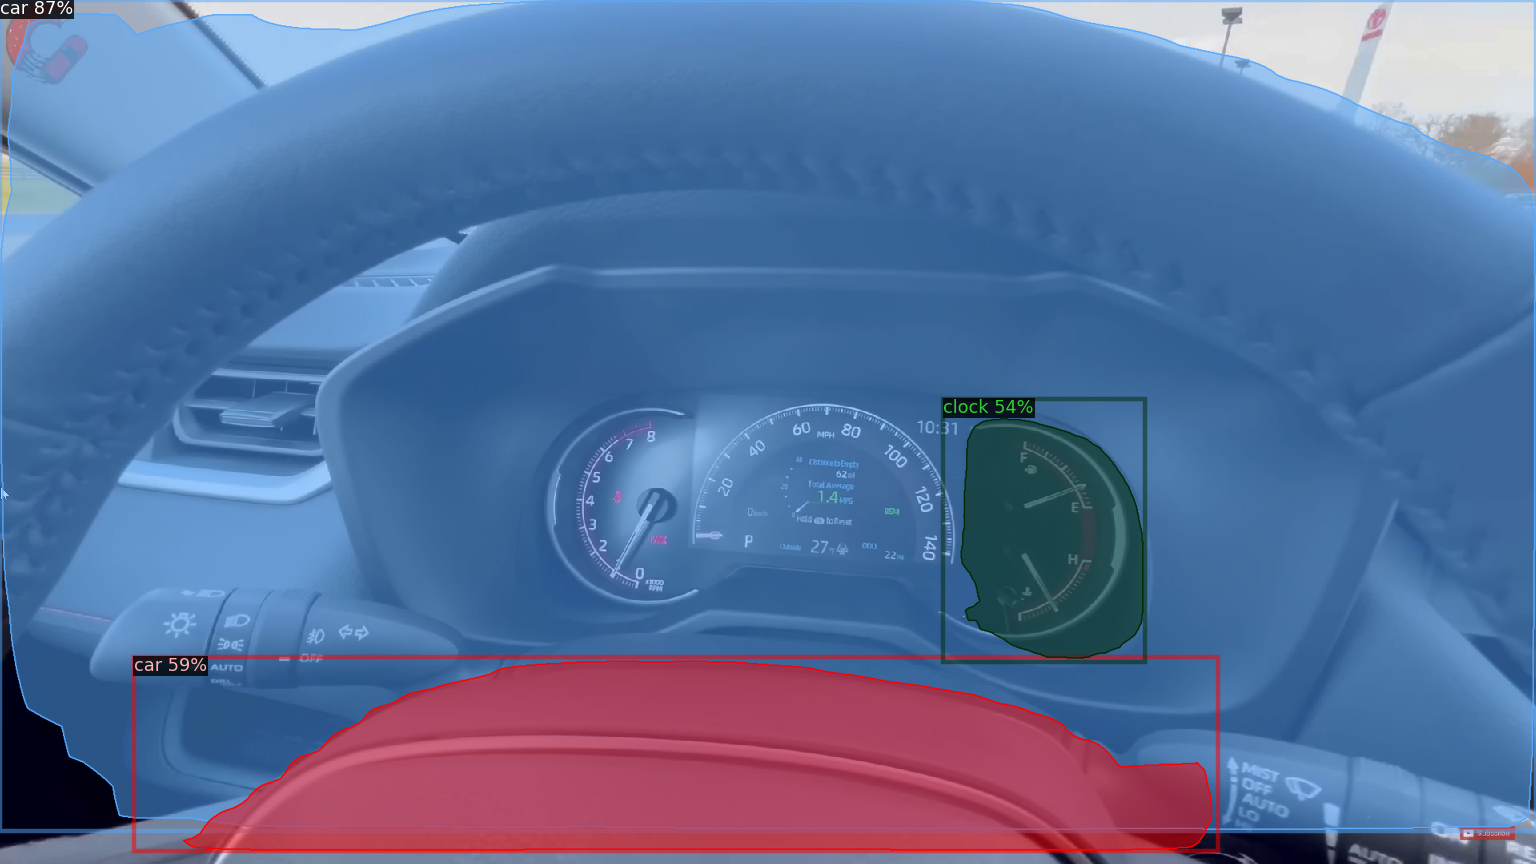

In [9]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

### Training on Our Custom Dataset

The annotation and labelling for this dataset is build using *makesense.ai*

In [10]:
from detectron2.data.datasets import register_coco_instances

In [11]:
register_coco_instances("my_train_dataset", {}, "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train/labels_display-meter_coco_train.json", "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train")
register_coco_instances("my_val_dataset", {}, "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val/labels_display-meter_coco_val.json", "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val")

In [12]:
train_metadata = MetadataCatalog.get("my_train_dataset")
train_dataset_dicts = DatasetCatalog.get("my_train_dataset")

[03/04 02:16:38 d2.data.datasets.coco]: Loaded 5 images in COCO format from /content/drive/MyDrive/Colab Notebooks/data/Meter-Display/train/labels_display-meter_coco_train.json


In [13]:
val_metadata = MetadataCatalog.get("my_val_dataset")
val_dataset_dicts = DatasetCatalog.get("my_val_dataset")

[03/04 02:16:39 d2.data.datasets.coco]: Loaded 3 images in COCO format from /content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val/labels_display-meter_coco_val.json


In [14]:
import matplotlib.pyplot as plt

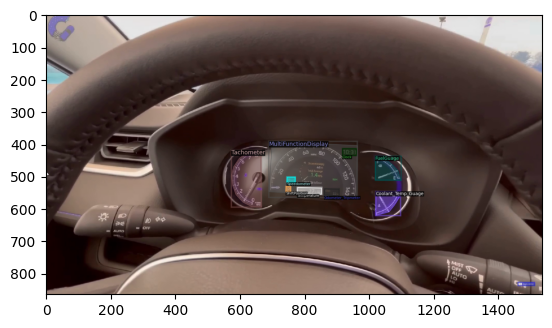

In [15]:
for d in random.sample(train_dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.8)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

## initialise wights and training on the custom dataset

In [16]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/Colab Notebooks/models/Detectron2_Models"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_train_dataset",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
# pick a good LR, do not decay learning rate
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = []
# Default is 512, using 256 for this dataset.
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256
# We have 9 classes.
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 9


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#Create an instance of of DefaultTrainer with the given configuration
trainer = DefaultTrainer(cfg)
#Load a pretrained model if available (resume training) or start training from scratch if no pretrained model is available
trainer.resume_or_load(resume=False)

[03/04 02:16:54 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


In [17]:
trainer.train()

[03/04 02:17:32 d2.engine.train_loop]: Starting training from iteration 0
[03/04 02:17:46 d2.utils.events]:  eta: 0:14:00  iter: 19  total_loss: 6.022  loss_cls: 2.402  loss_box_reg: 0.2518  loss_mask: 0.6914  loss_rpn_cls: 2.463  loss_rpn_loc: 0.2158    time: 0.5896  last_time: 0.5870  data_time: 0.0251  last_data_time: 0.0070   lr: 4.9953e-06  max_mem: 2755M
[03/04 02:18:01 d2.utils.events]:  eta: 0:14:08  iter: 39  total_loss: 4.244  loss_cls: 2.194  loss_box_reg: 0.4338  loss_mask: 0.6903  loss_rpn_cls: 0.7592  loss_rpn_loc: 0.1369    time: 0.5954  last_time: 0.6534  data_time: 0.0100  last_data_time: 0.0272   lr: 9.9902e-06  max_mem: 2755M
[03/04 02:18:13 d2.utils.events]:  eta: 0:14:02  iter: 59  total_loss: 3.507  loss_cls: 1.885  loss_box_reg: 0.7061  loss_mask: 0.6894  loss_rpn_cls: 0.0799  loss_rpn_loc: 0.1183    time: 0.5941  last_time: 0.6000  data_time: 0.0097  last_data_time: 0.0077   lr: 1.4985e-05  max_mem: 2757M
[03/04 02:18:25 d2.utils.events]:  eta: 0:13:58  iter: 79

### *In order to have reproduciblity we store the configuration in yaml file for the model which can be used for future reference and applications*

In [18]:
import yaml
config_yaml_path = "/content/drive/MyDrive/Colab Notebooks/models/Detectron2_Models/config.yaml"
with open(config_yaml_path, 'w') as file:
    yaml.dump(cfg, file)

In [19]:
# path to the model we just trained
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# set a custom testing threshold
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

[03/04 02:34:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Colab Notebooks/models/Detectron2_Models/model_final.pth ...


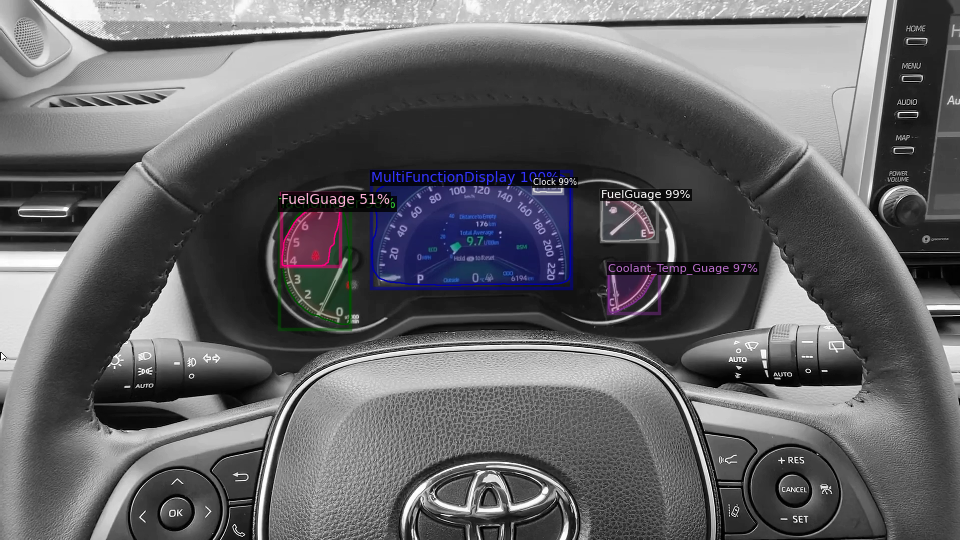

In [20]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(val_dataset_dicts, 1):    #select number of images for display
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [21]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_val_dataset", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_val_dataset")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

[03/04 02:34:15 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
[03/04 02:34:15 d2.data.datasets.coco]: Loaded 3 images in COCO format from /content/drive/MyDrive/Colab Notebooks/data/Meter-Display/val/labels_display-meter_coco_val.json
[03/04 02:34:15 d2.data.build]: Distribution of instances among all 9 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|  Speedometer  | 3            |     Clock     | 3            | Odometer_Tr.. | 3            |
|  Tachometer   | 3            |  Temperature  | 3            |   FuelGuage   | 3            |
| ShiftPosition | 3            | MultiFuncti.. | 3            | Coolant_Tem.. | 3            |
|               |              |               |              |               |              |
|     total     | 27           |               |              

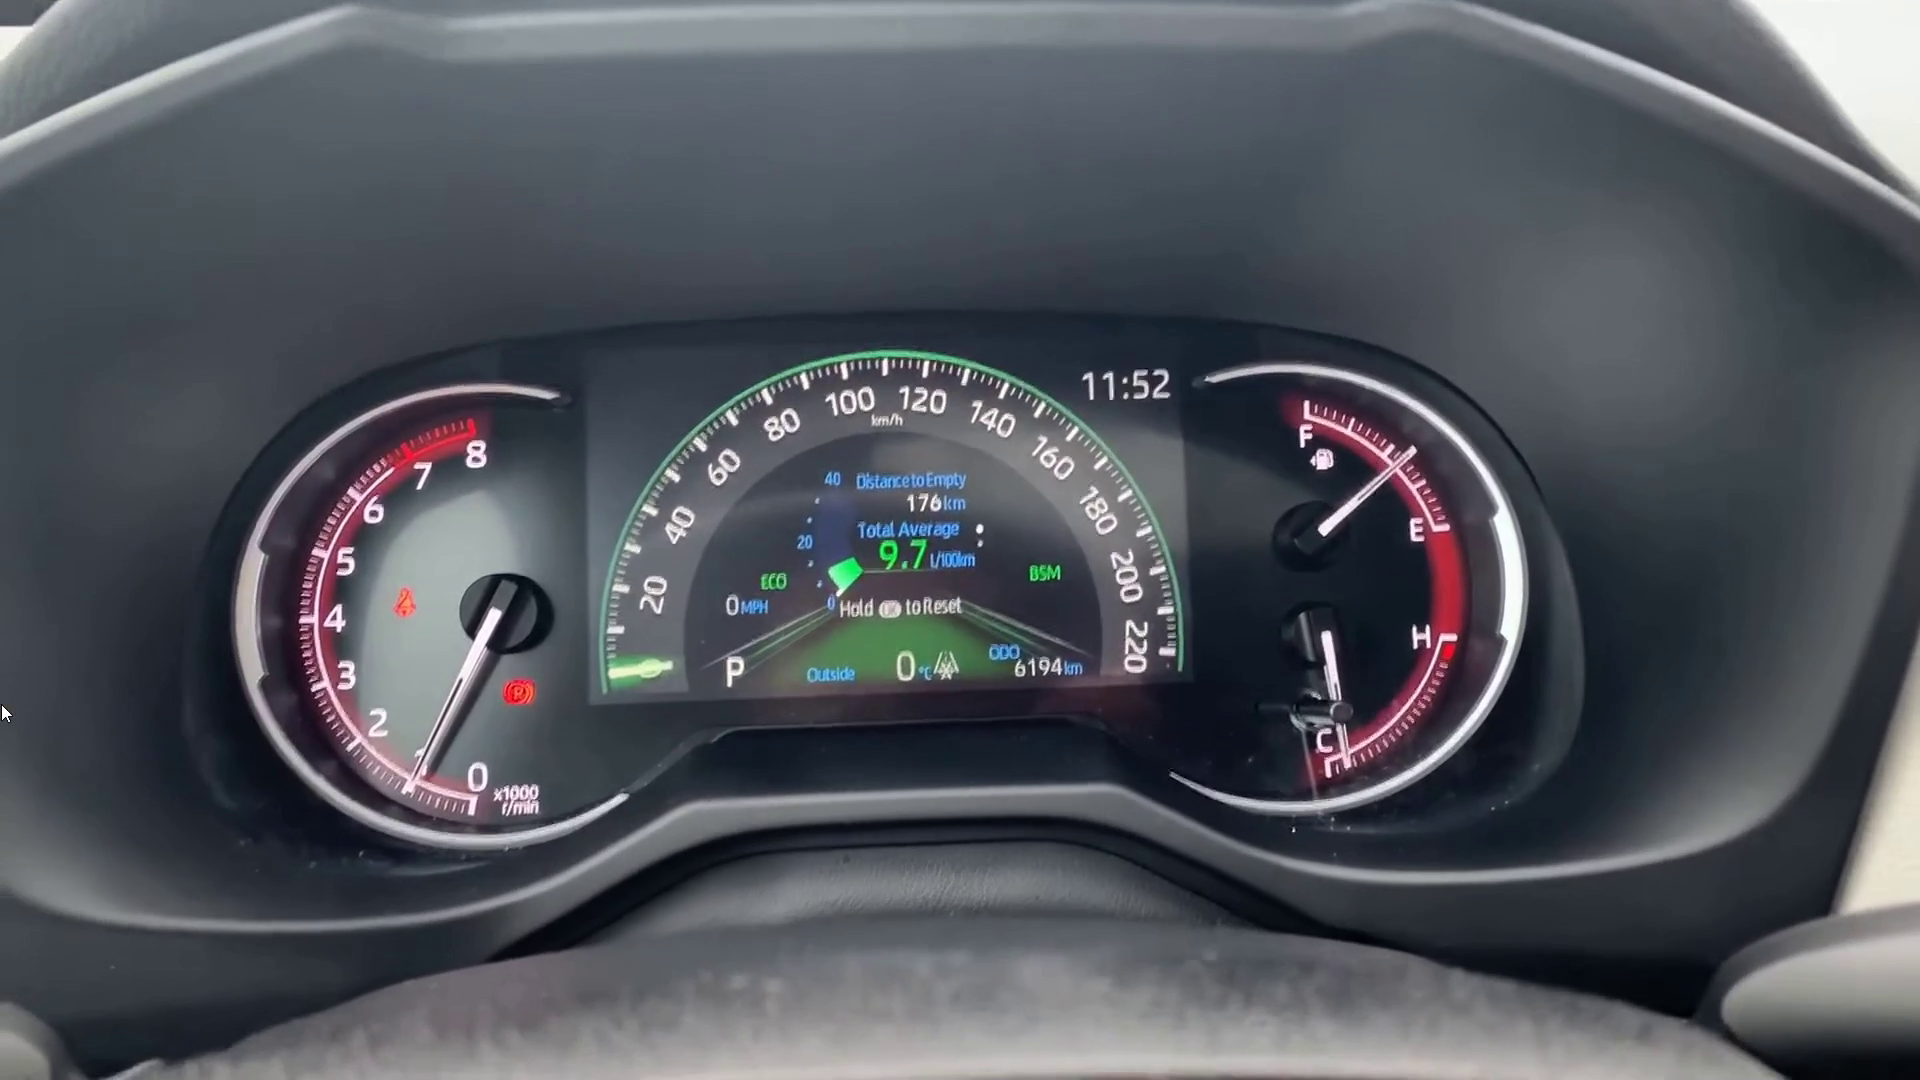

In [24]:
new_im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/test/190.png")
cv2_imshow(new_im)

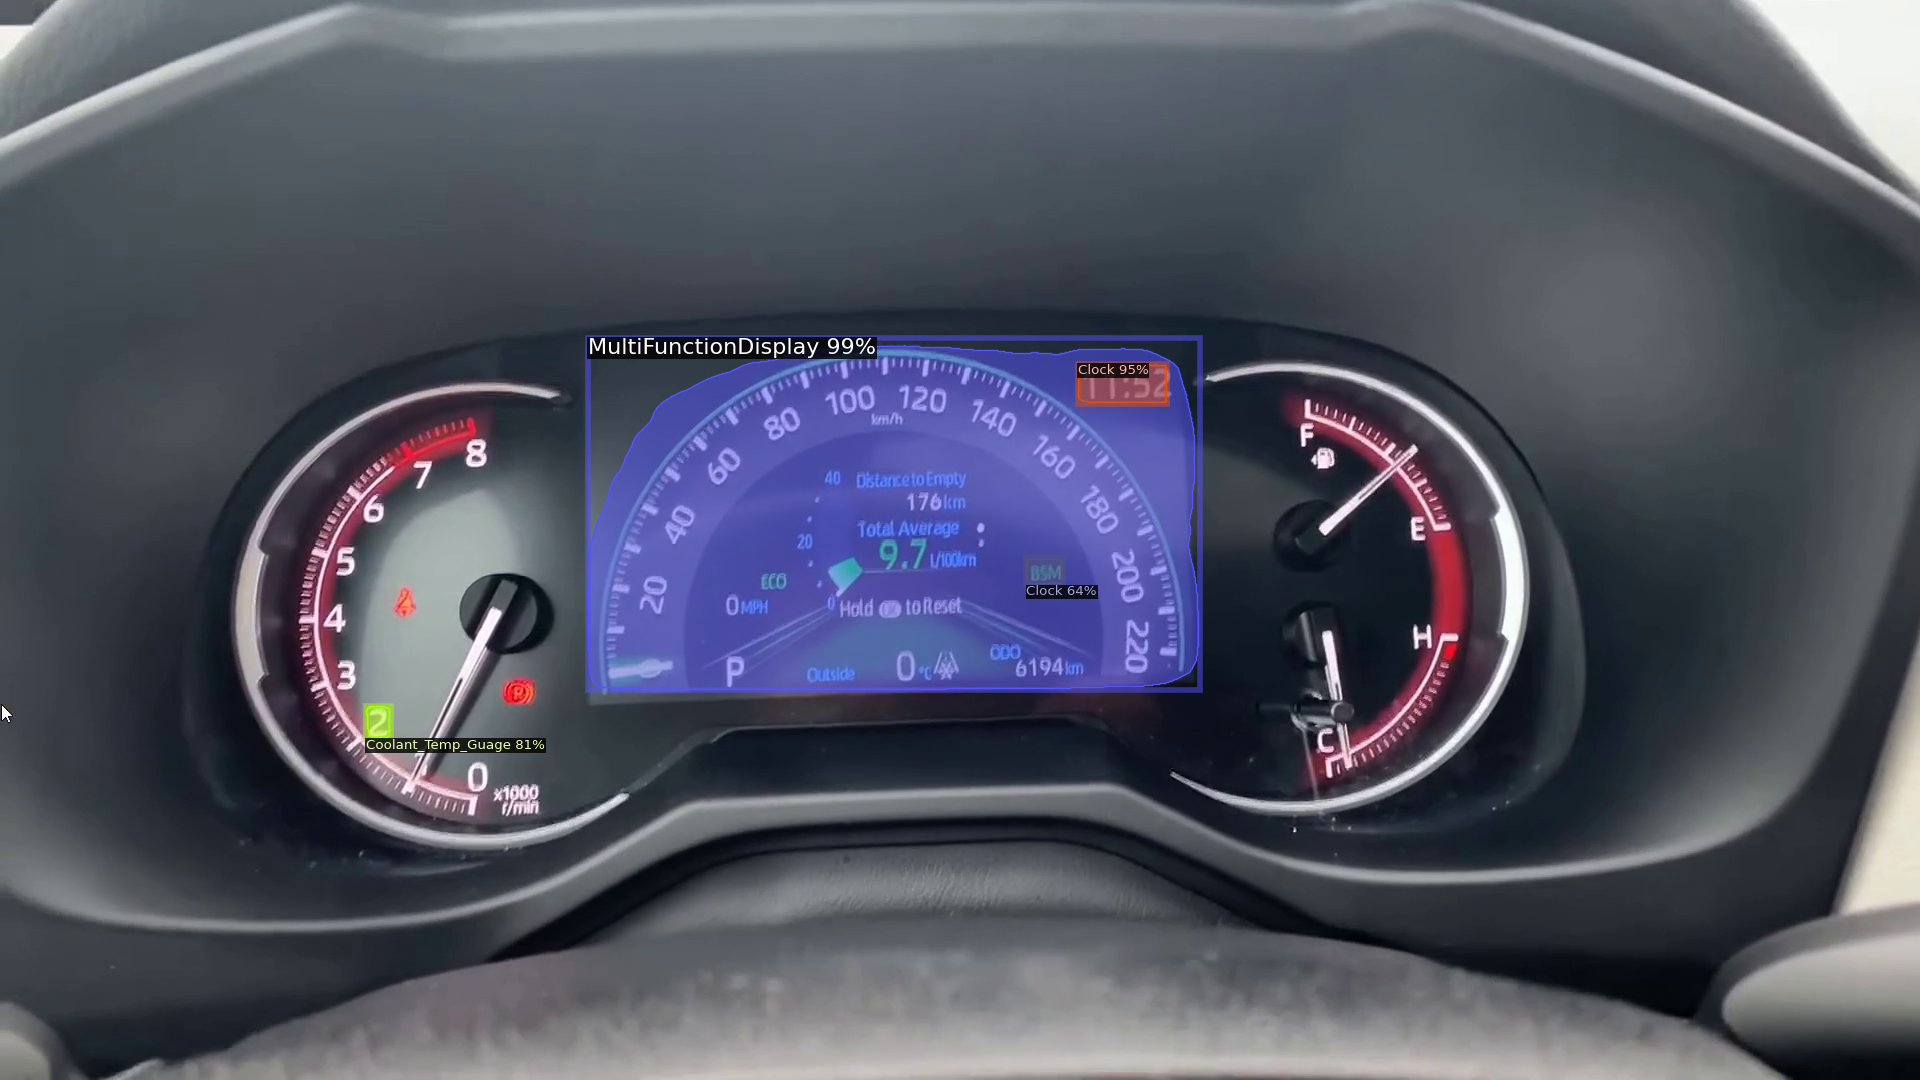

In [25]:
# new_im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/test/190.png")
output = predictor(new_im)

v = Visualizer(new_im[:, :, ::-1], metadata=train_metadata)
out = v.draw_instance_predictions(output['instances'].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])

In [28]:
input_images_dir = "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/test"
output_images_dir = "/content/drive/MyDrive/Colab Notebooks/data/Meter-Display/test_results"

for image_filename in os.listdir(input_images_dir):
  image_path = os.path.join(input_images_dir, image_filename)
  new_im = cv2.imread(image_path)

  outputs = predictor(new_im)

  v = Visualizer(new_im[:,:,::-1], metadata=train_metadata)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  result_filename = os.path.splitext(image_filename)[0] + "_result.png"
  output_path = os.path.join(output_images_dir, result_filename)

  # Save the segmented image
  cv2.imwrite(output_path, out.get_image()[:, :, ::-1])

print("Segmentation of all images completed.")


Segmentation of all images completed.
